In [1]:
from src import *

In [2]:
file_name = 'transfered_siamese_model_A'

siamese_model = make_siamese_model(make_embedding())
siamese_model.load_weights(os.path.join(SAVED_MODEL_PATH, f"{file_name}.h5"))

In [3]:
results = verify(siamese_model)
print(results)

Verifying 5 data.
[[1.2915420e-05]
 [1.5394688e-03]
 [1.3998151e-04]
 [1.8177927e-03]
 [9.9776685e-03]]


In [31]:
k,m =-1,-1

4 4


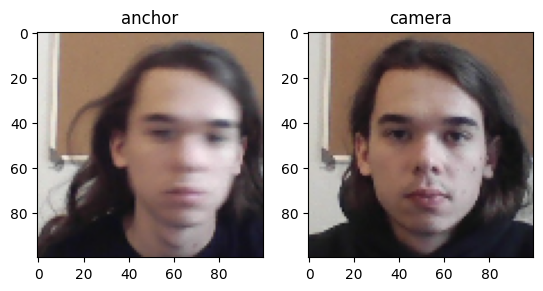

(1, 100, 100, 3)
[[0.00938833]]


In [36]:
# k = np.random.randint(0, len(os.listdir(ANC_PATH)))
# m = np.random.randint(0, len(os.listdir(VER_PATH)))
k+=1; m+=1
print(k,m)
anchor_file_path = os.path.join(ANC_PATH, os.listdir(ANC_PATH)[k])
verify_file_path = os.path.join(VER_PATH, os.listdir(VER_PATH)[m])

test_input = np.array(preprocess(anchor_file_path))
test_val = np.array(preprocess(verify_file_path))
plot_images_b2b(test_input, test_val, title1='anchor', title2='camera')

print(np.array([test_input]).shape)

result = siamese_model.predict([np.array([test_input]), np.array([test_val])])
print(result)

In [5]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    frame = frame[120:120+250,200:200+250, :]
    
    cv2.imshow('Verification', frame)
    
    # Verification trigger
    if cv2.waitKey(10) & 0xFF == ord('v'):
        # Save input image to application_data/input_image folder 
        cv2.imwrite(os.path.join(VER_PATH, 'input_image.jpg'), frame)
        # Run verification

        k = np.random.randint(0, len(os.listdir(ANC_PATH)))
        print(k)
        anchor_file_path = os.path.join(ANC_PATH, os.listdir(ANC_PATH)[k])
        verify_file_path = os.path.join(VER_PATH, 'input_image.jpg')

        test_input = np.array(preprocess(anchor_file_path))
        test_val = np.array(preprocess(verify_file_path))
        plot_images_b2b(test_input, test_val)
        result = siamese_model.predict([np.array([test_input]), np.array([test_val])])
        print(result)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()